# Análise de Clusterização de Frutas
### Autor: Gabriel Menegueli

In [2]:
# Importando as bibliotecas necessárias
# pandas: https://pandas.pydata.org/
# numpy: https://numpy.org/
# scipy: https://scipy.org/
# matplotlib: https://matplotlib.org/
# seaborn: https://seaborn.pydata.org/
# scikit-learn: https://scikit-learn.org/

import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

### Etapa 1: Carregando os dados
Nesta etapa, iremos carregar os dados dos arquivos fornecidos (.arff) e verificar as primeiras linhas de cada dataset para entender sua estrutura e tipos de dados.

# Mini explicação sobre arquivos .arff
Arquivos ARFF (Attribute-Relation File Format) são comumente usados para armazenar dados em formato tabular. 
Eles são amplamente utilizados em machine learning, especialmente em ferramentas como Weka. 
Um arquivo ARFF contém uma seção de cabeçalho, que define os atributos (ou colunas), 
e uma seção de dados, que contém os valores correspondentes a esses atributos.

In [4]:
# Carregando os dados do arquivo .arff
data_arff = arff.loadarff(r'./data/Date_Fruit_Datasets.arff')
df_arff = pd.DataFrame(data_arff[0])

# Exibindo as primeiras linhas do dataset .arff
print("Dados do arquivo .arff:")
print(df_arff.head())


Dados do arquivo .arff:
       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163.0   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136.0   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843.0   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063.0   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562.0   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947     424428.0  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974     339014.0  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962     528876.0  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948     418255.0  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908     350797.0  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB     EntropyRR     EntropyRG     EntropyRB 

### Etapa 2: Verificação e tratamento de valores faltantes
Nesta etapa, verificamos se há valores faltantes nos datasets. Caso existam, tomamos a decisão de preenchê-los ou removê-los. Para simplificar o processo, neste exemplo iremos remover quaisquer linhas que contenham valores faltantes.


In [6]:
# Verificando se os dados possuem valores faltantes
print("\nVerificando valores faltantes:")
print(df_arff.isnull().sum())

# Caso haja valores faltantes, podemos optar por preenchê-los ou removê-los
# Neste exemplo, vamos remover as linhas com valores faltantes
df_arff.dropna(inplace=True)


Verificando valores faltantes:
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


### Etapa 3: Padronização dos dados
A padronização é como "nivelar o campo de jogo" para os dados. Imagine que você tem um conjunto de variáveis
(ou características) como altura, peso, cor, etc., mas cada uma dessas variáveis pode ter unidades diferentes. 
Por exemplo, a altura pode estar em metros e o peso em quilos. Se não fizermos a padronização, as variáveis
com valores maiores (como peso) podem dominar a análise, mesmo que não sejam as mais importantes.
Padronizar os dados significa ajustar todas as variáveis para que elas tenham a mesma escala, 
garantindo que cada uma contribua igualmente para a análise.


In [8]:
# Padronizando os dados para a clusterização
scaler = StandardScaler()
scaled_arff = scaler.fit_transform(df_arff.iloc[:, :-1])

### Etapa 4: Redução de dimensionalidade com PCA
Os dados que usamos podem ter muitas variáveis (ou características), o que pode dificultar a visualização e análise. 
Imagine tentar entender um gráfico em 100 dimensões—impossível, certo? 
A Análise de Componentes Principais (PCA) é uma técnica que nos ajuda a simplificar os dados, 
reduzindo o número de variáveis mantendo o máximo de informação possível. 
É como comprimir um arquivo grande para torná-lo mais fácil de manusear sem perder muita informação.
Neste caso, usamos o PCA para reduzir os dados para duas dimensões, 
o que nos permite criar gráficos 2D fáceis de visualizar e entender.

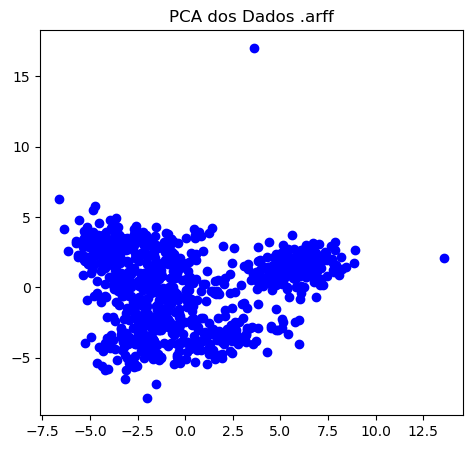

In [10]:
# Reduzindo a dimensionalidade dos dados para visualização usando PCA
pca = PCA(n_components=2)
pca_arff = pca.fit_transform(scaled_arff)

# Visualizando os dados em 2D
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_arff[:, 0], pca_arff[:, 1], c='blue', marker='o')
plt.title('PCA dos Dados .arff')

plt.show()

### Etapa 5: Testando Diferentes Métodos de Clusterização
Nesta etapa, aplicamos o algoritmo K-Means para clusterizar os dados. 
O número de clusters é escolhido de acordo com a necessidade ou com base em testes prévios.

#### O que é random_state?
Por que usar? O random_state é usado para garantir que o algoritmo K-Means, que começa com escolhas aleatórias, produza os mesmos resultados em diferentes execuções com os mesmos dados. Isso é útil para garantir que a análise seja consistente e que possamos reproduzir os resultados no futuro.

In [12]:
# 1. K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(scaled_arff)
silhouette_kmeans = silhouette_score(scaled_arff, clusters_kmeans)
print(f'Silhouette Score com K-Means: {silhouette_kmeans:.2f}')

# 2. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(scaled_arff)
silhouette_dbscan = silhouette_score(scaled_arff, clusters_dbscan) if len(set(clusters_dbscan)) > 1 else -1
print(f'Silhouette Score com DBSCAN: {silhouette_dbscan:.2f}')

# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
clusters_agglo = agglo.fit_predict(scaled_arff)
silhouette_agglo = silhouette_score(scaled_arff, clusters_agglo)
print(f'Silhouette Score com Agglomerative Clustering: {silhouette_agglo:.2f}')

# Escolhendo o Melhor Método

melhor_metodo = max([(silhouette_kmeans, 'K-Means', clusters_kmeans),
                     (silhouette_dbscan, 'DBSCAN', clusters_dbscan),
                     (silhouette_agglo, 'Agglomerative Clustering', clusters_agglo)],
                    key=lambda x: x[0])

print(f"\nMelhor método: {melhor_metodo[1]} com Silhouette Score de {melhor_metodo[0]:.2f}")


Silhouette Score com K-Means: 0.34
Silhouette Score com DBSCAN: -1.00
Silhouette Score com Agglomerative Clustering: 0.31

Melhor método: K-Means com Silhouette Score de 0.34


C:\Users\gmenegueli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Etapa 6: Salvando e visualizando os resultados do melhor método


DataFrame .arff com clusters atribuídos:
       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163.0   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136.0   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843.0   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063.0   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562.0   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRG  KurtosisRB  \
0    0.9947     424428.0  0.7831        1.2976  ...      2.9574      4.2287   
1    0.9974     339014.0  0.7795        1.2161  ...      2.6350      3.1704   
2    0.9962     528876.0  0.7657        1.3150  ...      3.8611      4.7192   
3    0.9948     418255.0  0.7759        1.2831  ...      8.6136      8.2618   
4    0.9908     350797.0  0.7569        1.3108  ...      2.9761      4.4146   

      EntropyRR     EntropyRG     Entr

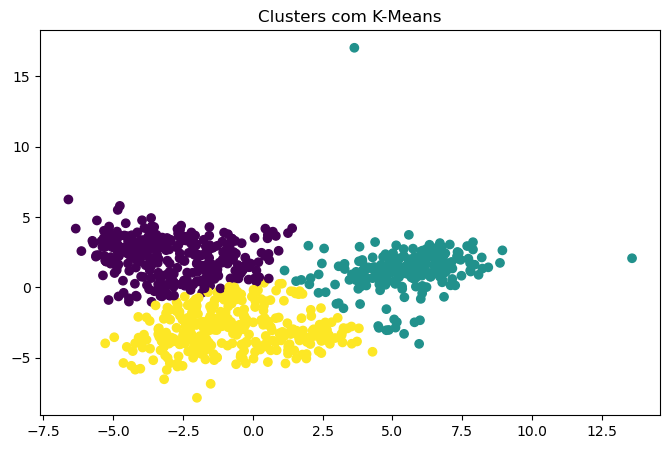

In [14]:
# Adicionando os clusters ao dataframe original
df_arff['Cluster'] = melhor_metodo[2]

# Salvando o dataframe com os clusters atribuídos
df_arff.to_csv(f'./data/Date_Fruit_Datasets_Clustered_{melhor_metodo[1]}.csv', index=False)

# Exibindo o dataframe com os clusters atribuídos
print("\nDataFrame .arff com clusters atribuídos:")
print(df_arff.head())

# Visualizando os clusters
plt.figure(figsize=(8, 5))
plt.scatter(pca_arff[:, 0], pca_arff[:, 1], c=melhor_metodo[2], cmap='viridis', marker='o')
plt.title(f'Clusters com {melhor_metodo[1]}')
plt.show()